In [14]:
#Cell 1 Import datasets and transform data
!pip install extra-keras-datasets

#Connect your gdrive to colab
from google.colab import drive
drive.mount('/content/gdrive')

from extra_keras_datasets import emnist
from keras.datasets import mnist
from tensorflow.keras import utils as np_utils
from sklearn.model_selection import train_test_split
import numpy as np 
from numpy import load

def load_gtsrb():
  x_train=load('/content/gdrive/MyDrive/datasets/GTSRB/x_train.npy')
  x_test=load('/content/gdrive/MyDrive/datasets/GTSRB/x_test.npy')

  y_train=load('/content/gdrive/MyDrive/datasets/GTSRB/y_train.npy')
  y_test=load('/content/gdrive/MyDrive/datasets/GTSRB/y_test.npy')
  return (x_train, y_train, x_test, y_test)

def load_bts():
  x_train=load('/content/gdrive/MyDrive/datasets/belgian/32/x_train_32.npy')
  x_test=load('/content/gdrive/MyDrive/datasets/belgian/32/x_test_32.npy')

  y_train=load('/content/gdrive/MyDrive/datasets/belgian/32/y_train_32.npy')
  y_test=load('/content/gdrive/MyDrive/datasets/belgian/32/y_test_32.npy')
  return (x_train, y_train, x_test, y_test)

def load_tsrd():
  x_train=load('/content/gdrive/MyDrive/datasets/tsrd/32/x_train_32.npy')
  x_test=load('/content/gdrive/MyDrive/datasets/tsrd/32/x_test_32.npy')

  y_train=load('/content/gdrive/MyDrive/datasets/tsrd/32/y_train_32.npy')
  y_test=load('/content/gdrive/MyDrive/datasets/tsrd/32/y_test_32.npy')
  return (x_train, y_train, x_test, y_test)  

def load_european():
  x_train=load('/content/gdrive/MyDrive/datasets/european/32/x_train_32.npy')
  x_test=load('/content/gdrive/MyDrive/datasets/european/32/x_test_32.npy')

  y_train=load('/content/gdrive/MyDrive/datasets/european/32y_train_32.npy')
  y_test=load('/content/gdrive/MyDrive/datasets/european/32/y_test_32.npy')
  return (x_train, y_train, x_test, y_test)  

def load_stanford_cars_50():
  x_train=load('/content/gdrive/MyDrive/datasets/stanford_cars/x_train.npy')
  x_test=load('/content/gdrive/MyDrive/datasets/stanford_cars/x_test.npy')

  y_train=load('/content/gdrive/MyDrive/datasets/stanford_cars/y_train.npy')  
  y_test=load('/content/gdrive/MyDrive/datasets/stanford_cars/y_test.npy')
  return (x_train, y_train, x_test, y_test)

def load_stanford_cars_70():
  x=load('/content/gdrive/MyDrive/datasets/stanford_cars/csv-version/x.npy')
  y=load('/content/gdrive/MyDrive/datasets/stanford_cars/csv-version/y.npy')

  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=100)

  return (x_train, y_train, x_test, y_test) 

def load_stanford_cars_brand():
  x=load('/content/gdrive/MyDrive/datasets/cars_brand/x.npy')
  y=load('/content/gdrive/MyDrive/datasets/cars_brand/y.npy')

  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=100)

  return (x_train, y_train, x_test, y_test)

dataset='gtsrb' # 
dformat='channels_last'
reduced=0
bconv=0

if dataset=='emnist':
    (x_train, y_train), (x_test, y_test) = emnist.load_data(type='balanced')
elif dataset=='gtsrb':
    (x_train, y_train, x_test, y_test) = load_gtsrb()
elif dataset=='bts':
    (x_train, y_train, x_test, y_test) = load_bts()
elif dataset=='tsrd':
    (x_train, y_train, x_test, y_test) = load_tsrd()
elif dataset=='european':
    (x_train, y_train, x_test, y_test) = load_european()
elif dataset=='stanford_cars_50':
    (x_train, y_train, x_test, y_test) = load_stanford_cars_50()
elif dataset=='stanford_cars_70':
    (x_train, y_train, x_test, y_test) = load_stanford_cars_brand()
elif dataset=='stanford_cars_brand':
    (x_train, y_train, x_test, y_test) = load_stanford_cars_brand()

print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

if (np.ndim(x_train)==3):   # Only for EMNIST to keep it compatible cu conv2d kernels in CNNs network
    x_train=np.reshape(x_train, [np.shape(x_train)[0],np.shape(x_train)[1],np.shape(x_train)[2], 1]) 
    x_test=np.reshape(x_test, [np.shape(x_test)[0],np.shape(x_test)[1],np.shape(x_test)[2], 1])

if bconv==0: 
  x_train = x_train.astype('float32') / 255
  x_test = x_test.astype('float32') /255
  
inp_chan=np.shape(x_train)[3]
print("Number of inpunt channels: " + str(inp_chan))
num_classes=np.max(y_train)+1

num_inputs = np.shape(x_test)[1]
input_shape=np.shape(x_train)[1:4]

# one can choose a lower numbers of training samples (when GPU MEM is overloaded)
if reduced>0:
    Ntr1=reduced
    x_train=x_train[0:Ntr1,:,:,:]
    y_train=y_train[0:Ntr1]
    print("X_train shape after reduction: " + str(x_train.shape))
    print("Y_train shape after reduction: " + str(y_train.shape))


yc_train = np_utils.to_categorical(y_train, num_classes)
yc_test = np_utils.to_categorical(y_test, num_classes)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
X_train shape: (39209, 32, 32, 3)
Y_train shape: (39209,)
Number of inpunt channels: 3


In [2]:
# RUN THIS CELL ONLY TO PREPARE DATA FOR MOBILENETv2 
# expands to 32x32 and 3 channels 
# only for EMNIST

from skimage import transform
# from https://github.com/astorfi/TensorFlow-World/tree/master/docs/tutorials/3-neural_network/autoencoder

def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    print("Imgs pre-reshape : " + str(imgs.shape))
    imgs = imgs.reshape((-1, 28, 28, 1)) #mai adauga o dimensiune
    print("Imgs after reshape : " + str(imgs.shape))
    print("Imgs shape[0] : " + str(imgs.shape[0]))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    print("Resized_img after reshape : " + str(resized_imgs.shape))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs


x_train=resize_batch(x_train)
x_test=resize_batch(x_test)

# 3 chans expansion  
if inp_chan<3:
  
  x_train = np.repeat(x_train, 3, -1)
  x_test =  np.repeat(x_test, 3, -1)
input_shape=np.shape(x_train)[1:4]

Imgs pre-reshape : (55000, 28, 28, 1)
Imgs after reshape : (55000, 28, 28, 1)
Imgs shape[0] : 55000
Resized_img after reshape : (55000, 32, 32, 1)
Imgs pre-reshape : (18800, 28, 28, 1)
Imgs after reshape : (18800, 28, 28, 1)
Imgs shape[0] : 18800
Resized_img after reshape : (18800, 32, 32, 1)


In [15]:
# NL_CNN MODEL 
# Returns a precompiled model with a specific optimizer included 
#==============================================================================================
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D  # straturi convolutionale si max-pooling 
from keras.optimizers import RMSprop, SGD, Adadelta, Adam, Nadam
import keras.backend as K
import tensorflow as tf
import scipy.linalg as sclin
import time as ti
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.io as sio


def create_nl_cnn_model(input_shape, num_classes, k=1.5,separ=0, flat=0, width=80, nl=(3,2), add_layer=0):
  # Arguments: k - multiplication coefficient 
  # Structure parameteres 
  kfil=k
  filtre1=width ; filtre2=int(kfil*filtre1) ; filtre3=(kfil*filtre2)  # filters (kernels) per each layer - efic. pe primul 
  nr_conv=3 # 0, 1, 2 sau 3  (number of convolution layers)
  csize1=3; csize2=3 ; csize3=3      # convolution kernel size (square kernel) 
  psize1=4; psize2=4 ; psize3=4      # pooling size (square)
  str1=2; str2=2; str3=2             # stride pooling (downsampling rate) 
  pad='same'; # padding style ('valid' is also an alternative)
  nonlinlayers1=nl[0]  # total of layers (with RELU nonlin) in the first maxpool layer  # De parametrizat asta 
  nonlinlayers2=nl[1]  # 

  nonlin_type='relu' # may be other as well 'tanh' 'elu' 'softsign'
  bndrop=1 # include BatchNorm inainte de MaxPool si drop(0.3) dupa .. 
  cvdrop=1 # droput 
  drop_cv=0.5
  
  model = Sequential()
  # convolution layer1  ==========================================================================
  # Initially first layer was always a Conv2D one
  if separ==1:
    model.add( SeparableConv2D(filtre1, padding=pad, kernel_size=(csize1, csize1), input_shape=input_shape) )
  elif separ==0: 
    model.add( Conv2D(filtre1, padding=pad, kernel_size=(csize1, csize1), input_shape=input_shape) )

  # next are the additional layers 
  for nl in range(nonlinlayers1-1):
    model.add(Activation(nonlin_type))  # Activ NL-CNN-1
    if separ==1:
      model.add(SeparableConv2D(filtre1, padding=pad, kernel_size=(csize1, csize1) ) ) # Activ NL-CNN-2
    elif separ==0:
      model.add(Conv2D(filtre1, padding=pad, kernel_size=(csize1, csize1)) ) # Activ NL-CNN-2
  #  MaxPool in the end of the module 
  if bndrop==1:
    model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(psize1, psize1),strides=(str1,str1),padding=pad))
  if cvdrop==1:
    model.add(Dropout(drop_cv))
  
  # NL LAYER 2 =======================================================================================================
 
  if separ==1:
    model.add(SeparableConv2D(filtre2, padding=pad, kernel_size=(csize2, csize2)) )
  elif separ==0:
    model.add(Conv2D(filtre2, padding=pad, kernel_size=(csize2, csize2)) )
  # aici se adauga un neliniar 
    
  #=========== unul extra NL=2 pe strat 2 =====================
  for nl in range(nonlinlayers2-1):
    model.add(Activation(nonlin_type))  # Activ NL-CNN-1
    if separ==1:
        model.add(SeparableConv2D(filtre2, padding=pad, kernel_size=(csize2, csize2)) ) # Activ NL-CNN-2
    elif separ==0:
        model.add(Conv2D(filtre2, padding=pad, kernel_size=(csize2, csize2)) ) # Activ NL-CNN-2
        
  # OUTPUT OF LAYER 2 (MAX-POOL)
  if bndrop==1:
      model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(psize2, psize2),strides=(str2,str2),padding=pad))
  if cvdrop==1:
      model.add(Dropout(drop_cv))
  #-------------------------------------------------------------------------------------------
  # LAYER 3 
      
  if separ==1:
      model.add(SeparableConv2D(filtre3, padding=pad, kernel_size=(csize3, csize3)) )  # SeparableConv
  elif separ==0:
      model.add(Conv2D(filtre3, padding=pad, kernel_size=(csize3, csize3)) ) # Activ NL-CNN-2
  # OUTPUT OF LAYER 3 
  if bndrop==1:
      model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(psize3, psize3),strides=(str3,str3),padding=pad))
  if cvdrop==1:
      model.add(Dropout(drop_cv))
  #------------------- 
  # 
  # LAYER 4  (only if requested - for large images ?? )
  if add_layer==1:    
    if separ==1:
      model.add(SeparableConv2D(1.2*filtre3, padding=pad, kernel_size=(csize3, csize3)) )  # SeparableConv
    elif separ==0:
      model.add(Conv2D(1.2*filtre3, padding=pad, kernel_size=(csize3, csize3)) ) # Activ NL-CNN-2
    # OUTPUT OF LAYER 4
    if bndrop==1:
      model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(psize3, psize3),strides=(str3,str3),padding=pad))
    if cvdrop==1:
      model.add(Dropout(drop_cv))
  #========================================================================================
  # INPUT TO DENSE LAYER (FLATTEN - more data can overfit / GLOBAL - less data - may be a good choice ) 
  if flat==1:
      model.add(Flatten())  # 
  elif flat==0:
      model.add(GlobalAveragePooling2D()) # Global average 
   
  model.add(Dense(num_classes, activation='softmax'))
  # END OF MODEL DESCRIPTION 
  # ------------------ COMPILE THE MODEL
  myopt = Adam()
  #myopt = Nadam()
  if separ==1:
    myopt = RMSprop(lr=0.01) 
    #myopt = Adam(lr=0.05)

  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])

  return model

  #######################LB-CNN-MODEL########################################

def create_lb_cnn_model(input_shape, num_classes, type_convolution = 2, filtre=(100,100,100), numar_straturi=1, neuroni_ascunsi=(0,0)):
#--------------  Output layer MLP  (nhid1=nhid2=0 recommended for low complexity) 
  nhid1 = neuroni_ascunsi[0] # hidden-1 neurons (put 0 if nhid2=0, or a desired value)
  nhid2 = neuroni_ascunsi[1] # hidden-2 neurons (take 0 for 0 or 1 hidden layer)

#
# ----------------- CONV expander layers (up to 3) ------------------------------------------------------------
  nr_conv=numar_straturi # 0, 1, 2 sau 3  (number of convolution layers)
  filtre1=filtre[0] ; filtre2=filtre[1] ; filtre3=filtre[2]  # filters (kernels) per each layer 
  csize1=3 ; csize2=3 ; csize3=3      # convolution kernel size (square kernel) 
  psize1=4; psize2=4 ; psize3=2      # pooling size (square)
  str1=2; str2=2; str3=2             # stride pooling (downsampling rate) 
  pad='same'; # padding style ('valid' is also an alternative)
  type_conv=type_convolution # 1='depth_wise' or 2='normal' 
# ------------------- Optimizer -----------------------------------------------------------------
  #myopt = SGD(learning_rate=0.01, decay=1e-6, momentum=.9, nesterov=True)
  #myopt =Adadelta(learning_rate=.1)  # implicit are lr=1 # cum influenteaza valoarea procesul de antrenare ?? 
  myopt = RMSprop(learning_rate=0.0005) 
  #myopt = Adam(learning_rate=0.001)
  #myopt = Adam()
# --------------------------   LOSS function  ------------------------------------
  #my_loss='mean_squared_error'  
  #my_loss='mean_absolute_error'
  my_loss='categorical_crossentropy'

#-------------------------- MODEL DESCRIPTION ------------------------------
  model = Sequential()

  if nr_conv>=1:
      if type_conv==2:
          model.add(Conv2D(filtre1, padding=pad, kernel_size=(csize1, csize1), input_shape=input_shape))
      elif type_conv==1:
          model.add(DepthwiseConv2D(kernel_size=csize2, padding=pad, input_shape=input_shape, depth_multiplier=filtre1, use_bias=False))
      #model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(psize1, psize1),strides=(str1,str1),padding=pad))
      #model.add(Activation('relu'))
      if nr_conv>=2:
          if type_conv==2:
              model.add(Conv2D(filtre2, padding=pad, kernel_size=(csize2, csize2)) )
          elif type_conv==1:
              model.add(DepthwiseConv2D(kernel_size=csize2, padding=pad, depth_multiplier=filtre2, use_bias=False))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(psize2, psize2),strides=(str2,str2),padding=pad))
          #model.add(Activation('relu'))
          if nr_conv==3:
              if type_conv==2:
                  model.add(Conv2D(filtre3, padding=pad, kernel_size=(csize3, csize3)) )
              elif type_conv==1:
                  model.add(DepthwiseConv2D(kernel_size=csize3, padding=pad, depth_multiplier=filtre3, use_bias=False))
              #model.add(Activation('relu'))
              model.add(MaxPooling2D(pool_size=(psize3, psize3),strides=(str3,str3),padding=pad))
              #model.add(Activation('relu'))
      model.add(Activation('relu'))
      model.add(Flatten())
      #model.add(Activation('relu'))
      #model.add(Dropout(0.25))
  elif nr_conv==0:
      model.add(Flatten(input_shape=input_shape))
# ---- first fc hidden layer  
  if nhid1>0:
      model.add(Dense(nhid1, activation='relu'))
      #model.add(Dropout(0.5))
# ---- second fc hidden layer 
  if nhid2>0:
      model.add(Dense(nhid2, activation='relu'))
  #   model.add(Dropout(0.2))
#   output layer 
  if (nhid1+nhid2)==0:
      model.add(Dense(num_classes, activation='softmax',input_shape=(num_inputs,)))
  else: 
      model.add(Dense(num_classes, activation='softmax'))

# --- MODEL COMPILE --------------------------------------------------------

  model.compile(loss=my_loss, 
              optimizer=myopt,   # se poate alege oricare dintre obiectele optimizer definite mai sus 
              metrics=['accuracy'])
  return model

def create_model_mobilenetv2(input_shape, num_classes, alpha_value=0.75):
  pretrained_model = tf.keras.applications.MobileNetV2(alpha=alpha_value, input_shape=[input_shape[0], input_shape[1], 3], include_top=False)
  pretrained_model.trainable = True   
  # True - all weights are trained; False: only the output layer is trained 

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model

def create_model_nasnetmobile50(input_shape, num_classes):
  pretrained_model = tf.keras.applications.NASNetMobile(include_top=False, input_shape=[input_shape[0], input_shape[1], 3], weights=None)
  pretrained_model.load_weights('/content/gdrive/MyDrive/datasets/NASNet-mobile-no-top.h5')
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model

def create_resnet50_model(input_shape, num_classes):
  pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=[input_shape[0], input_shape[1], 3])
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model

def create_densenet121_model(input_shape, num_classes):
  pretrained_model = tf.keras.applications.DenseNet121(include_top=False, input_shape=[input_shape[0], input_shape[1], 3])
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model


def create_effnetb0_model(input_shape, num_classes):
  pretrained_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=[input_shape[0], input_shape[1], 3])
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model

def create_effnetb1_model(input_shape, num_classes):
  pretrained_model = tf.keras.applications.EfficientNetB1(include_top=False, input_shape=[input_shape[0], input_shape[1], 3])
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(1000,activation='relu'),  # Numai daca se doreste un strat dens suplimentar 
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  myopt = Adam()
  #myopt = Nadam()
  # --------------------------   LOSS function  ------------------------------------
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  return model
    


In [ ]:
'''
BCONV MODULE 
This module loads dataset (one of MNIST, CIFAR10 or Fashion-MNIST)
# Copyright Radu & Ioana DOGARU - radu_d@ieee.org , Aug. 13 2019 
# More details in paper 
# R. Dogaru and Ioana Dogaru, "BCONV-ELM: Binary Weights Convolutional 
# Neural Network Simulator based on Keras/Tensorflow for Low Complexity 
# Implementations", in Proceedings ISEEE 2019, in Press. 
# Please cite the above paper if you find this code useful 
'''

import keras.backend as K
import tensorflow as tf
import scipy.linalg as sclin
import numpy as np
import time as ti
from sklearn.preprocessing import StandardScaler
'''

Uses K.backend methods to implement (GPU/CPU) a preprocessing 
layer with up to 2 convolutional layers (each with abs() 
value nonlinearity and pooling)
Convolution kernels are BINARY and RANDOM !
THIS MODULE WOULD GENERATE out_train out_test 
AS THE OUTPUT OF A PREPROCESSING NONLINEAR LAYER 
WITH UP TO 2 CONVOLUTIONAL LAYERS AND x_train x_test tuple at the input. 
'''

#------------------------ Algo parameters ----------
########################################################

# convolutional layers 
typ_con=2 #  1 = depthwise (); 2 = normal (as usually used in Keras CNNs)
filtre1=10; filtre2=16 # if filtre2=0 only the first layer is implemented  
ksize1=3; ksize2=3    # kernel size on layers 1 & 2 
pool=(2,2); pool2=(3,3)  # pool size on layers 1 & 2 
strp1=2; strp2=2 # strides on pooling layers 1 & 2 
strc1=1; strc2=1 # strides on conv layers 1 & 2 
pmode='max'  # pooling mode (alternative is  'average', lower performance) 
pad='same' # 'same' (alternative is  'valid' ) results in less outputs but performance may decrease
reduced = 0 # 0-full; >0 = reduced set of training samples (using all samples - choose 0)
use_stored = 0 # use bk wher bk=(ker,ker2) are best kernels (saved after run in console mode)
# choose 0 above for loop tuning (then run all cells 5-10 trials saving bk=(ker,ker2) for any improvement in ELM0 accuracy)
# choose 1 above after tuning then run all cells (now ELM is not active)
epoci=1 # epochs in the MLP (use 1 in the ELM loop tuning phase with Run ALL)

print('Dataset is:', dataset)
print('Convolution type is (1-depthwise, 2-classic)',typ_con)
print('Layer 1: filters:',filtre1,' kernel size:',ksize1,'pooling size:',pool,'strides pooling:',strp1)
print('Layer 1: filters:',filtre2,' kernel size:',ksize2,'pooling size:',pool2,'strides pooling:',strp2)
print('Pooling mode is:',pmode,'  Padding is: ',pad)


#Dataset loading

print("BCONV-ELM - " + dataset + str(x_train.shape))

# definitie primul strat de convolutii (liniare)
def convlayer(inlay,ker_,pool,strp,strc,typ_con,pad,pmode):
# inlay este intrarea (multicanal si organizata [samples, x_size, y_size, channells])
# ker_ este variabila kernel organizata in forma [x_size, x_sixe, channels, filtre ]
    dformat='channels_last'
    if typ_con==1:
        out_=K.depthwise_conv2d(inlay, ker_, strides=(1, 1), padding=pad, data_format=dformat)
    elif typ_con==2:
        out_=K.conv2d(inlay, ker_, strides=(1, 1), padding=pad, data_format=dformat)
        
    nout_=K.pool2d(out_,pool, strides=(strp, strp), padding=pad, data_format=dformat ,pool_mode=pmode)
    nout__=K.abs(nout_) # useful nonlinearity   (instead of  RELU)
    out_=K.batch_flatten(nout__)  # flatten all ELM 
    return out_, nout_

#================ Apply the conv. layers ==============================
inp_chan=np.shape(x_train)[3]
print('Number of input channels in image:', inp_chan)

# Construct model (binary random kernels) 
# Layer 1 kernels (without bias)
ker=np.sign(np.random.rand(ksize1,ksize1,inp_chan,filtre1).astype('float32')-0.5)
#ker=(np.random.rand(ksize1,ksize1,inp_chan,filtre1).astype('float32')-0.5)
ker=1*(ker)/(ksize1*ksize1) #scaling 

if use_stored==1: 
    ker=bk[0]
# Layer 2 kernels (without bias)
if typ_con==1:
    ker2=np.sign(np.random.rand(ksize2,ksize2,filtre1*inp_chan,filtre2).astype('float32')-0.5)
    #ker2=np.random.rand(ksize2,ksize2,filtre1*inp_chan,filtre2).astype('float32')-0.5

elif typ_con==2: 
    ker2=np.sign(np.random.rand(ksize2,ksize2,filtre1,filtre2).astype('float32')-0.5)
    # scaling 
    #ker2=1*(ker2)/(ksize2*ksize2)
    #ker2=bker2
    #There are 4 dimensions  (a,b,c,d) a,b dim. kernel ; 
    # c -numeber of channels (1 or 3 for the input, more for 2'nd layer) 
    # d is the number of  filters opened by this convolution layer .. 
if use_stored==1:
    ker2=bk[1]    
# Implementing the processing flow for (train / test) 
intrain=K.variable(x_train)
intest=K.variable(x_test)
print(intrain.shape)
ker_=K.variable(ker)
ker2_=K.variable(ker2)

out_train1_, nout_tr=convlayer(intrain,ker_,pool,strp1,strc1,typ_con,pad,pmode)
out_test1_, nout_ts=convlayer(intest,ker_,pool,strp1,strc1,typ_con,pad,pmode)
# Note: out_ are "flatten" outputs,  nout_ are structured outputs  
print('Layer 1:',np.shape(nout_tr))
# Plus an additional conv layer  
if filtre2>0: 
    out_train_, nout_tr2=convlayer(nout_tr,ker2_,pool2,strp2,strc2,typ_con,pad,pmode)
    out_test_, nout_ts2=convlayer(nout_ts,ker2_,pool2,strp2,strc2,typ_con,pad,pmode) 
    print('Layer 2:',np.shape(nout_tr2))
else:
    out_train_=out_train1_
    out_test_=out_test1_
    
# Effective computation of the input preprocessing flow 
t1=ti.time()
out_train=K.eval(out_train_)
out_test=K.eval(out_test_)
t2=ti.time()
K.clear_session()  # to avoid overloads 

# Number of parameters 


print('Convolutional layers processing time (train + test): ',t2-t1)
print('Number of bits in KER1:',np.size(ker))
print('Number of bits in KER2:',np.size(ker2))
print('Output structure:  ',np.shape(out_train))

Dataset is: emnist
Convolution type is (1-depthwise, 2-classic) 2
Layer 1: filters: 10  kernel size: 3 pooling size: (2, 2) strides pooling: 2
Layer 1: filters: 16  kernel size: 3 pooling size: (3, 3) strides pooling: 2
Pooling mode is: max   Padding is:  same
BCONV-ELM - emnist(112800, 28, 28, 1)
Number of input channels in image: 1
(112800, 28, 28, 1)
Layer 1: (112800, 14, 14, 10)
Layer 2: (112800, 7, 7, 16)
Convolutional layers processing time (train + test):  0.14508819580078125
Number of bits in KER1: 90
Number of bits in KER2: 1440
Output structure:   (112800, 784)


In [ ]:
'''
#  ELM MODULE  
#================================================================================
#  Due to limited GPU RAM - input size should be smaller than 5000 on Kaggle 
#  or arrange to have less input samples (e.g. 10000 input samples)
#  On other platforms it depends on the available resources. 
#  For larger inputs size is better to use the latest cell (implementing a
#  typical multilayer perceptron  MLP in Keras)
# Copyright Radu & Ioana DOGARU - radu_d@ieee.org 
# More details in paper 
# R. Dogaru and Ioana Dogaru, "BCONV-ELM: Binary Weights Convolutional 
# Neural Network Simulator based on Keras/Tensorflow for Low Complexity 
# Implementations", in Proceedings ISEEE 2019, in Press. 
# Please cite the above paper if you find this code useful 
# 
#--------------------------------------------------------------------------
'''
import time as ti
import keras.backend as K
import tensorflow as tf
from extra_keras_datasets import emnist
import numpy as np

#pentru asta trebuie sa am in y nvaloarea clasei

#reduced = 0
#(x_train, y_train), (x_test, y_test) = emnist.load_data(type='balanced')
print(x_train.shape)
#if reduced>0:
    #Ntr1=reduced
    #x_train=x_train[0:Ntr1,:,:,:] - profu
    #x_train=x_train[0:Ntr1,:,:]
    #y_train=y_train[0:Ntr1]

nr_neuroni= 20000 # Proposed number of neurons on the hidden layer (va folosi modulul BCONV si alt numar pt elm)
C=0.001 # Regularization coefficient C  (small value / useful for 0 neurons)
if nr_neuroni==0:
    C=0.1 # only for no-hidden layer 
tip=3 # Nonlinearity of the hidden layer (-1 means linear layer)
if nr_neuroni==0:
    tip=-1   # 
nb_in=2;  # 0 = float; x - represents weights on a finite x number of bits 
nb_out=8; # same as above but for the output layer
orig=1 # 0 - works with (out_train out_test) from BCONV; 
       # 1 works with original data - no conv. layers (x_train x_test)
       # 0 - convolved data ; 1 - directly applied to ELM 
#===============  TRAIN DATASET LOADING ==========================================

def hidden(x_,inw_,tip):
# Hidden layer definit ca "flow" Keras (argumentele sunt "variables")
      hin_=K.dot(inw_,x_)
      #----------  HIDDEN LAYER --------- 
      if tip==-1:  # liniar (Adaline only)
        h_=hin_
      elif tip==0: # tanh
        h_=K.tanh(hin_)
      elif tip==1:  # linsat 
        h_=K.abs(1+hin_)-K.abs(1-hin_)
      elif tip==2: # ReLU
        h_=K.relu(hin_)
      elif tip==3: 
            h_=K.abs(hin_)
      elif tip==4:
            h_=K.sqrt(K.square(hin_)+1)
      #------------------------------------ 
      return h_

# implements the ELM training procedure with weight quantization       
def elmTrain_fix( X, Y, h_Neurons, C , tip, ni):
# Training phase - emulated fixed point precision (ni bit quantization)
# X - Samples (feature vectors) Y - Labels
# ni - number of bits to quantize the inW weights 
      Ntr = np.size(X,1)
      in_Neurons = np.size(X,0)
      classes = np.max(Y)
      # transforms label into binary columns  
      targets = np.zeros( (classes, Ntr), dtype='int8' )
      for i in range(0,Ntr):
          targets[Y[i]-1, i ] = 1
      targets = targets * 2 - 1
      
      #   Generare inW 
      #   Generate inW layer 
      #   Takes care if h_Neurons==0 
      if h_Neurons==0:
          inW=np.eye(in_Neurons)
          h_Neurons=in_Neurons
    
      else: 
          rnd = np.random.RandomState()
          inW=-1+2*rnd.rand(h_Neurons, in_Neurons).astype('float32')
          #inW=rnd.randn(nHiddenNeurons, nInputNeurons).astype('float32')
          if ni>0:
            Qi=-1+pow(2,ni-1) 
            inW=np.round(inW*Qi)
      
      #  Compute hidden layer 
      iw_=K.variable(inW)
      x_=K.variable(X)
      h_=hidden(x_,iw_,tip)  
      #------------------------------------      
      # Moore - Penrose computation of output weights (outW) layer 
      ta_=K.variable(targets)
      print('KERAS ACTIVE')
      if h_Neurons<Ntr:
          print('LLL - Less neurons than training samples')
          outw_=tf.linalg.solve(K.eye(h_Neurons)/C+K.dot(h_,K.transpose(h_)),K.dot(h_,K.transpose(ta_)))  
      else:
          print('MMM - More neurons than training samples')
          outw_=K.dot(h_,tf.linalg.solve(K.eye(Ntr)/C+K.dot(K.transpose(h_),h_),K.transpose(ta_)))
      outW=K.eval(outw_)   
      K.clear_session()     
      return inW, outW 
      

def elmPredict_optim( X, inW, outW, tip):
# implements the ELM predictor given the model as arguments 
# model is simply given by inW, outW and tip 
# returns a score matrix (winner class has the maximal score)
      x_=K.variable(X)
      iw_=K.variable(inW)
      ow_=K.variable(outW)
      h_=hidden(x_,iw_,tip) 
      mul1=K.dot(K.transpose(h_),ow_)
      sc_=K.transpose(mul1)
      score = K.eval(sc_)
      K.clear_session() 
      return score 
        

#===============  TRAIN DATASET LOADING ==========================================
# converts out_train, y_train into Samples Labels 

if orig==1:
    intrain=K.variable(x_train)
    Samples_=K.batch_flatten(intrain)  # aici se aplica direct datele de intrare 
    Samples=(K.eval(Samples_)).T
    print(Samples.shape)
else:
    Samples=out_train.T 
    print("BCONV - " + str(Samples.shape))


#clase=y_train.shape[1]
Labels=(y_train.T+1).astype('int8')

if (np.ndim(Labels)<2): 
    Labels=np.reshape(Labels,[1,np.shape(Labels)[0]])
clase=np.max(Labels)
print('nr de clase ' + str(clase))
#================= TRAIN ELM =====================================================
t1 = ti.time()
inW, outW = elmTrain_fix(Samples, np.transpose(Labels), nr_neuroni, C, tip, nb_in)
trun = ti.time()-t1
print(" training time: %f seconds" %trun)

# ==============  Quantify the output layer ======================================
Qout=-1+pow(2,nb_out-1)
if nb_out>0:
     O=np.max(np.abs(outW))
     outW=np.round(outW*(1/O)*Qout)

#================= TEST (VALIDATION) DATASET LOADING 


if orig==1:
    intest=K.variable(x_test)
    Samples_=K.batch_flatten(intest)  # aici se aplica direct datele de intrare 
    Samples=(K.eval(Samples_)).T
else: 
    Samples=out_test.T 

Labels=(y_test.T+1).astype('int8')
if (np.ndim(Labels)<2):
    Labels=np.reshape(Labels,[1,np.shape(Labels)[0]])  # acopera cazul MNIST 

n=Samples.shape[0]
N=Samples.shape[1]

#====================== VALIDATION PHASE (+ Accuracy evaluation) =================
t1 = ti.time()
scores = elmPredict_optim(Samples, inW, outW, tip)
trun = ti.time()-t1
print( " prediction time: %f seconds" %trun)

# CONFUSION MATRIX computation ==================================
Conf=np.zeros((clase,clase),dtype='int16')
for i in range(N):
    # gasire pozitie clasa prezisa 
    ix=np.where(scores[:,i]==np.max(scores[:,i]))
    ixx=np.array(ix)
    pred=int(ixx[0,0])
    actual=Labels[0,i]-1
    Conf[actual,pred]+=1
accuracy=100.0*np.sum(np.diag(Conf))/np.sum(np.sum(Conf))
print("Confusion matrix is: ")
print(Conf)
print("Accuracy is: %f" %accuracy)
print( "Number of hidden neurons: %d" %nr_neuroni)
print( "Hidden nonlinearity (0=sigmoid; 1=linsat; 2=Relu; 3 - ABS; 4- multiquadric): %d" %tip)
K.clear_session() 
#====================================================================================   


(50000, 28, 28, 1)
(784, 50000)
nr de clase 47
KERAS ACTIVE
LLL - Less neurons than training samples
 training time: 18.159588 seconds
 prediction time: 0.234889 seconds
Confusion matrix is: 
[[268   0   0 ...   1   0   0]
 [  0 279   1 ...   1   0   0]
 [  2   0 310 ...   3   0   0]
 ...
 [  1   0   2 ... 177   0   2]
 [  0   0   0 ...   0 369   1]
 [  1   3   1 ...   1   8 313]]
Accuracy is: 79.563830
Number of hidden neurons: 20000
Hidden nonlinearity (0=sigmoid; 1=linsat; 2=Relu; 3 - ABS; 4- multiquadric): 3


In [ ]:
# -----------------------------------------------------------------------
# KERAS MLP (Up to 2 hidden layer - 0 hidden layers (MLP0)= Adaline 
#  is recommended for low cpx.) 
#  Slower than  ELM0, but gives better accuracies
#  Fixed point quantization of the MLP0 is implemented in the last cell !
#--------------------------------------------------------
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adadelta, Adam, Nadam
from tensorflow.keras import utils as np_utils

import matplotlib.pyplot as plt

batch_size = 100  #  (small values - larger training times but better accuraccy ) 
epoci = 100 # Number of epochs 
train_style = 2 # 1-the Keras usual in examples ; 2 keeps best result during training in all epochs (recommended)
#--------------  structura model neuronal --------------------------------------------------------
nescalat =0  # 0 for scaled data (1 additional scalling) 
nhid1 = 0 # hidden1 - take 0 for MLP0 (Adaline) - if > 0 nhid2 may also be used 
nhid2 = 0 # hidden2 - take 0 for MLP0 (or other value if nhid1>0)
drop1= 0.0 # droput if drop1>0
# Liniar output layer (nhid1=nhid2=0)
# ------------------- Optimizer -----------------------------------------------------------------
#myopt=SGD(lr=0.01)
#myopt = SGD(lr=.007, decay=1e-6, momentum=.9, nesterov=True)
myopt =Adadelta(learning_rate=0.1)  # implicit are lr=1 # cum influenteaza valoarea procesul de antrenare ?? 
#myopt = RMSprop(lr=0.01) 
#myopt = Nadam()
#myopt=Adam()

# -------------------------- Loss choice ------------------------------------
#my_loss='mean_squared_error'  # desigur se pot alege si alte versiuni 
#my_loss='mean_absolute_error'
my_loss='categorical_crossentropy'

# ---------------  conversie  categorical (vector coloana cu 1 pe linia asociata clasei) 
#num_classes = 1+np.max(y_test).astype('int8')
#num_inputs = np.shape(out_test)[1] #- asta e pt retele clasice cnn
#num_inputs = 1 #- pt elm si bconv
print('Number of inputs: ',num_inputs)
print("y_test shape: " + str(y_test.shape))
print("out_test shape: " + str(out_test.shape))
#yc_train = np_utils.to_categorical(y_train, num_classes)
#yc_test = np_utils.to_categorical(y_test, num_classes)

#------------  MODEL Definition  ----------------------------------------
# Nota: se poate construi propriul model (vezi https://gist.github.com/abhaikollara/430c0491c851cf0b05a852f1faa805d7  )
# ----------------------------------------------
model = Sequential()
if nhid1>0:
    model.add(Dense(nhid1, activation='relu', input_shape=(num_inputs,)))
    if drop1>0: 
        model.add(Dropout(drop1))
# second hidden layer 
if nhid2>0:
    model.add(Dense(nhid2, activation='relu'))
#   model.add(Dropout(0.2))
# output layer 
if (nhid1+nhid2)==0:
    model.add(Dense(num_classes, activation='softmax',input_shape=(num_inputs,)))
else: 
    model.add(Dense(num_classes, activation='softmax'))


# --- MODEL COMPILE ---------------------------------------

model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])

# --- RUNS THE MODEL 
#----
model.summary()

err_test=np.zeros(epoci)   # For plot   
best_acc=0.0
best_ep=0
t1=ti.time()
for k in range(epoci):
    model.fit(out_train, yc_train,
              batch_size=batch_size,
              epochs=1,
              verbose=0,  #  0 (no details) 1 (details) 2(only epochs)
              validation_data=(out_test, yc_test))
    score = model.evaluate(out_test, yc_test, verbose=0)
    err_test[k]=score[1]
    print('Epoch:',k,' ACC:',100*score[1],'| ')
    if score[1]>best_acc : 
            print('improved in epoch:', k, 'best accuracy so far: ', 100*score[1],'%')
            best_acc=score[1]
            best_ep=k
            best_pars=model.get_weights()
t2=ti.time()
print('Best accuracy:', best_acc*100, '% obtained in epoch: ',best_ep, ' running  ',epoci,' epochs in ',t2-t1,' seconds')
t1=ti.time()
score = model.evaluate(out_test, yc_test, verbose=0); 
t2=ti.time()
print('Time for prediction (test set):', t2-t1)
plt.plot(err_test)
print('If quantization is desired see the next cell')

In [ ]:
# QMLP0 (quantified MLP0 module)
# Quantization of the above resulted model (only for MLP0)
# Copyright Radu and Ioana DOGARU;  radu.dogaru@ieee.org
#=============================================================
nb_out=8
outW=np.copy(best_pars)
Qout=-1+pow(2,nb_out-1)
if (nb_out >0) & (nhid1==0) :
    O=np.max(np.abs(outW[0]))
    outW[0]=np.round(outW[0]*(1/O)*Qout)
    outW[1]=np.round(outW[1]*(1/O)*Qout)
    model.set_weights(outW)
    score = model.evaluate(out_test, y_test, verbose=0)
    best_acc=score[1]
    print('Output layer quantized with:', nb_out, 'bits')
    print('Quantified accuracy is:', best_acc*100,'%')
outW=model.get_weights() # the resulting model 
Bconvmodel=(ker,ker2,outW)

In [32]:
#Choose model

model_name='resnet50'

if model_name=='nl_cnn':
  print("Generating model " + model_name)
  model = create_nl_cnn_model(input_shape, num_classes, k=2, separ=0, flat=0, width=50, nl=(2,2), add_layer=1)
  model.summary()
elif model_name=='lb_cnn':
  model = create_lb_cnn_model(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='mobilenetv2':
  model = create_model_mobilenetv2(input_shape, num_classes, alpha_value=0.75)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='nasnetmobile50':
  model = create_model_nasnetmobile50(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='resnet50':
  model = create_resnet50_model(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='densenet121':
  model = create_densenet121_model(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='effnetb0':
  model = create_effnetb0_model(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name)
elif model_name=='effnetb1':
  model = create_effnetb1_model(input_shape, num_classes)
  model.summary()
  print("Generating model " + model_name) 
    

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 43)                88107     
Total params: 23,675,819
Trainable params: 23,622,699
Non-trainable params: 53,120
_________________________________________________________________
Generating model resnet50


(12630, 32, 32, 3)
(12630,)
/ 0 epoch lasted  31.585200548171997  seconds
Improved in epoch: 0  New accuracy:  1.6627078875899315 %
/ 1 epoch lasted  40.982667684555054  seconds
Improved in epoch: 1  New accuracy:  13.586698472499847 %
/ 2 epoch lasted  24.89275813102722  seconds
Improved in epoch: 2  New accuracy:  92.16151833534241 %
/ 3 epoch lasted  25.310256719589233  seconds
Improved in epoch: 3  New accuracy:  94.44972276687622 %
/ 4 epoch lasted  24.237404823303223  seconds
/ 5 epoch lasted  40.98401236534119  seconds
/ 6 epoch lasted  40.983193159103394  seconds
/ 7 epoch lasted  40.98431992530823  seconds
/ 8 epoch lasted  40.986207008361816  seconds
/ 9 epoch lasted  24.637237787246704  seconds
Best accuracy: 94.44972276687622 % reached in epoch:  3  running   10  epochs lasts  386.0570251941681  seconds
Total number of parameters:  23675819
Test accuracy: 0.9444972276687622
Time to predict on the test set :  4.741960287094116
Latency (per input sample): 0.37545212091006464 

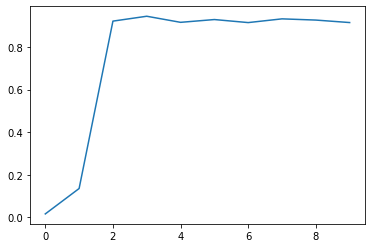

In [33]:
# TRAINING OF THE NL-CNN, LB-CNN and predefinied networks  
#-----------------  for reproductibility  ----------------------
import tensorflow as tf 
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
#----------------------------------------------------

import keras
import numpy as np # linear algebra
import keras.backend as K 

import time as ti 
import scipy.io as sio
import matplotlib.pyplot as plt

#=====================================================================
batch_size = 100  # Ranging betwee 10 (small datasets) to 100 (larger datasets)
epoci = 10 # maximal number of training epochs (the best result may be obtained earlier)
#----------------------------------------------------------------------------------------

print(x_test.shape)
print(y_test.shape)

err_test=np.zeros(epoci)   # For plotting test error evolution  
best_acc=0.0
best_ep=0
t1=ti.time()
for k in range(epoci):
      tx=ti.time()
      model.fit(x_train, yc_train,
              batch_size=batch_size,
              epochs=1,
              verbose=0,  # aici 0 (nu afiseaza nimic) 1 (detaliat) 2(numai epocile)
              validation_data=(x_test, yc_test))
      
      ty=ti.time()
      print('/',k,'epoch lasted ',ty-tx,' seconds')
      
      score = model.evaluate(x_test, yc_test, verbose=0)
      
      err_test[k]=score[1]
      if score[1]>best_acc : 
            print('Improved in epoch:', k, ' New accuracy: ', 100*score[1],'%')
            best_acc=score[1]
            best_ep=k
            bp=model.get_weights()
t2=ti.time()
print('Best accuracy:', best_acc*100, '% reached in epoch: ',best_ep, ' running  ',epoci,' epochs lasts ',t2-t1,' seconds')
plt.plot(err_test)
model.set_weights((bp)) # evaluete prediction time on all test samples
t1=ti.time()

score = model.evaluate(x_test, yc_test, verbose=0)

t2=ti.time()
print ('Total number of parameters: ',model.count_params())
print('Test accuracy:', score[1])
print ('Time to predict on the test set : ',t2-t1)
print('Latency (per input sample):', 1000*(t2-t1)/np.shape(x_test)[0], 'ms')

In [34]:
# SAVING AND VISUALIZATION OF A MODEL  
#-----------------------------------------------------------
nume_dorit = 'resnet_gtsrb_94_44'
file_path = '/content/gdrive/MyDrive/datasets/modele/' + nume_dorit
model.save(file_path+'.h5')  
print('Model ' + nume_dorit + ' saved!')

#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file=nume_dorit+'.png', show_shapes=True, show_layer_names=True, dpi=96)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Model resnet_gtsrb_94_44 saved!


Original label: 39.0
Recognized label:  39


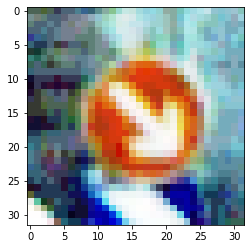

In [37]:
# Predicting labels  

selectia=int(np.shape(x_test)[0]*np.random.rand(1))  # 

img1=x_test[selectia,:,:,:]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
if np.shape(x_train)[3]==1:
  plt.imshow(img1[:,:,0],cmap='gray')
elif np.shape(x_train)[3]==3:
  plt.imshow(img1)

label=np.dot(yc_test[selectia,:],1+np.array(range(num_classes)).T)
print('Original label:', label)
z=model.predict(x_test[selectia:selectia+1,:,:,:])
print('Recognized label: ',1+np.argmax(z))

In [36]:
from keras.models import load_model
model=load_model('/content/gdrive/MyDrive/datasets/modele/resnet_gtsrb_94_44.h5')
model.summary()
t1=ti.time()
score = model.evaluate(x_test, yc_test, verbose=0)
t2=ti.time()
print('Test accuracy:', score[1])
print ('Time for test set : ',t2-t1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 43)                88107     
Total params: 23,675,819
Trainable params: 23,622,699
Non-trainable params: 53,120
_________________________________________________________________
Test accuracy: 0.9444972276687622
Time for test set :  9.065977096557617
